# 머신러닝 프로젝트 진행 절차

<hr>

## 00. import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지는 출력되지 않게 함
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 주피터 노트북에서 그래프가 보이는 설정
%matplotlib notebook

In [3]:
# 한글 font 설정
import platform
import matplotlib.font_manager as fm

#matplotlib 패키지 한글 깨짐 처리 시작
#------------------------------------------------------------------------------------
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
    
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [4]:
# 글씨 선명하게 출력하는 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<IPython.core.display.Javascript object>


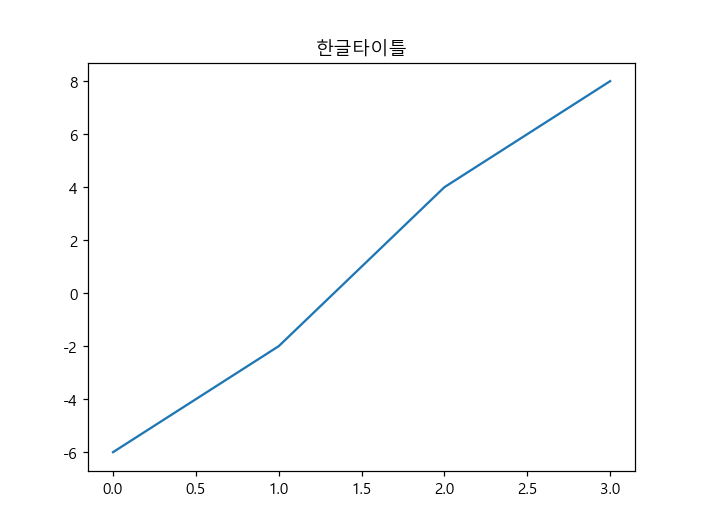

<AxesSubplot: title={'center': '한글타이틀'}>

In [5]:
# 한글폰트와 마이너스 폰트 설정 확인

pd.Series([-6, -2, 4, 8]).plot(title="한글타이틀")

In [6]:
plt.close('all')

In [7]:
# sklearn train_test_split의 동일한 결과 출력을 위해 선언
np.random.seed(5000)

<hr>

## 01. 문제 정의
##### 농구 선수 경기 기록을 바탕으로, 그 선수의 포지션을 예측하는 ML 모델 만들기

<hr>

## 02. 데이터 수집

In [8]:
# 데이터를 수집했다고 가정
df = pd.read_csv('data/basketball_stat.csv', encoding='cp949')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [9]:
# position의 종류 확인
df['Pos'].value_counts()   # SG: Shooting Guard, C: Center

SG    50
C     50
Name: Pos, dtype: int64

<hr>

## 03. 데이터 시각화
##### 데이터 특징을 바탕으로 한 공간에 시각화함으로써, 머신러닝 학습에 필요한 특징과 불필요한 특징을 쉽게 구분지을 수 있음

<IPython.core.display.Javascript object>


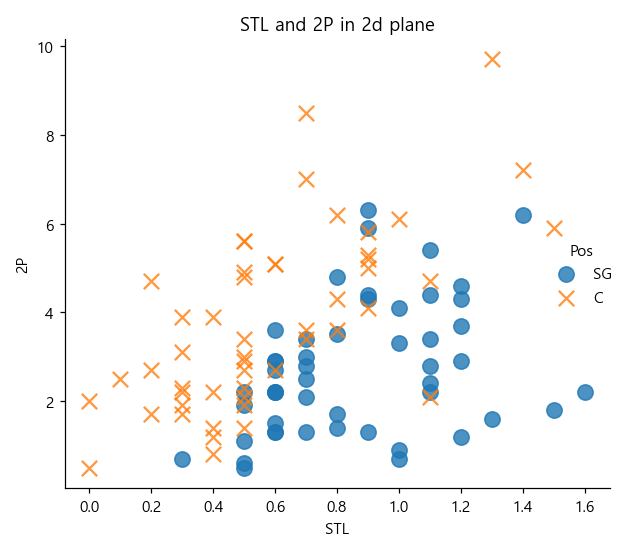

In [10]:
# 스틸[STL], 2점슛[SP] 시각화
sns.lmplot(df,
           x='STL', y='2P',
           hue='Pos',
           fit_reg=False,
           scatter_kws={'s':100},
           markers=["o", "x"])
plt.title("STL and 2P in 2d plane")
plt.tight_layout()

In [11]:
plt.close('all')

<IPython.core.display.Javascript object>


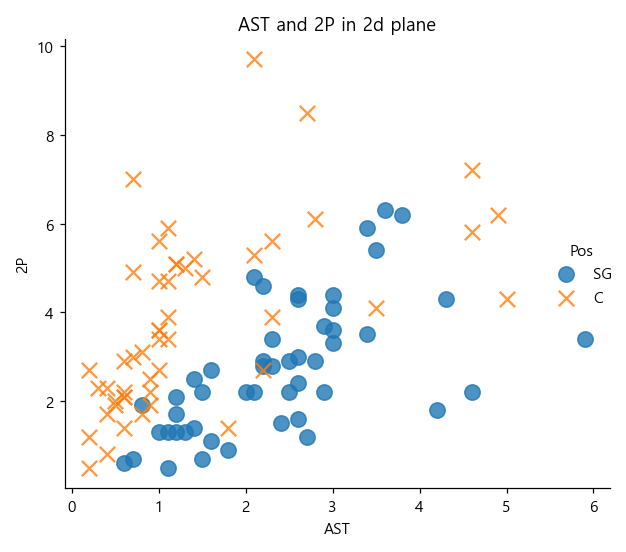

In [12]:
# 어시스트, 2점슛 데이터 시각화
fig = sns.lmplot(df,
                 x='AST', y='2P',
                 hue='Pos',
                 fit_reg=False,
                 scatter_kws={'s':100},
                 markers=["o", "x"])
plt.title("AST and 2P in 2d plane")
plt.tight_layout()

In [13]:
plt.close('all')

<IPython.core.display.Javascript object>


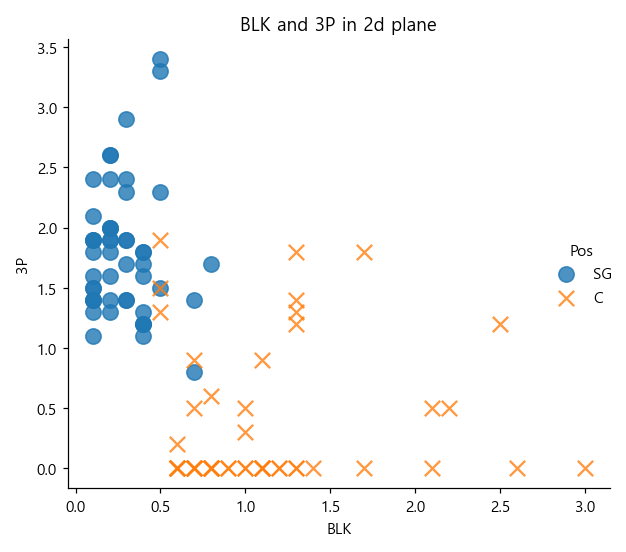

In [14]:
# 블로킹, 3점슛 데이터 시각화
fig = sns.lmplot(df,
                 x='BLK', y='3P',
                 hue='Pos',
                 fit_reg=False,
                 scatter_kws={'s':100},
                 markers=["o", "x"])
plt.title("BLK and 3P in 2d plane")
plt.tight_layout()

In [15]:
plt.close('all')

<IPython.core.display.Javascript object>


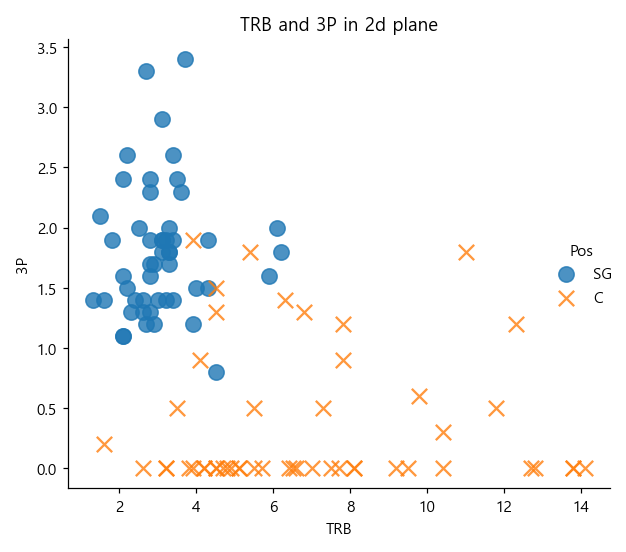

In [16]:
# 리바운드, 3점슛 데이터 시각화
fig = sns.lmplot(df,
                 x='TRB', y='3P',
                 hue='Pos',
                 fit_reg=False,
                 scatter_kws={'s':100},
                 markers=["o", "x"])
plt.title("TRB and 3P in 2d plane")
plt.tight_layout()

In [17]:
plt.close('all')

<hr>

## 05. 데이터 전처리

In [18]:
# 분별력이 없는 특징(feature)을 데이터에서 제거
df2 = df.drop(['2P', 'AST', 'STL'], axis=1)
df2.head(3)

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6


<hr>

## 06. 데이터 나누기 (학습용/검증용)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# 20%의 데이터를 테스트 데이터로 사용
train, test = train_test_split(df2, test_size=0.2)
print("train data shape:", train.shape)
print("test data shape:", test.shape)

train data shape: (80, 5)
test data shape: (20, 5)


<hr>

## 07. 데이터셋 저장

In [21]:
train.to_csv("data/train.csv", encoding='cp949', index=False)
test.to_csv('data/test.csv', encoding='cp949', index=False)